In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# Question 1: Data Exploration
### I) Descriptive statistics

In [57]:
file_path = 'diabetes.csv'
# 1. Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

In [58]:
# 2. Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 788
Number of columns: 9


In [59]:
# 3. Calculate min, max, mean, and std of the 'age' column
age_min = df['Age'].min()
age_max = df['Age'].max()
age_mean = df['Age'].mean()
age_std = df['Age'].std()

print(f'Minimum age: {age_min}')
print(f'Maximum age: {age_max}')
print(f'Mean age: {age_mean}')
print(f'Standard deviation of age: {age_std}')

Minimum age: 12
Maximum age: 81
Mean age: 33.21573604060914
Standard deviation of age: 11.819874550957666


In [60]:
# 4. Calculate the mode of the 'age' column
age_modes = df['Age'].mode()
print(type(age_modes))
# Comment on the modality of the data
if len(age_modes) == 1:
    print('The data is unimodal (has one mode).')
elif len(age_modes) == 2:
    print('The data is bimodal (has two modes).')
else:
    print(f'The data is multimodal (has {len(age_modes)} modes).')

<class 'pandas.core.series.Series'>
The data is unimodal (has one mode).


In [61]:
# 5. Calculate the first quartile (Q1) and the third quartile (Q3) of the 'age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
print(f'First Quartile (Q1): {Q1}')
print(f'Third Quartile (Q3): {Q3}')

First Quartile (Q1): 24.0
Third Quartile (Q3): 41.0


In [62]:
# 6. Calculate the Interquartile Range (IQR) of the 'age' column
IQR = Q3 - Q1
print(f'Interquartile Range (IQR): {IQR}')

Interquartile Range (IQR): 17.0


In [63]:
# 7. Print the five-number summary of the 'age' column
print(f'Minimum age: {age_min}')
print(f'First Quartile (Q1): {Q1}')
print(f'Median (Q2): {df["Age"].median()}')
print(f'Third Quartile (Q3): {Q3}')
print(f'Maximum age: {age_max}')

Minimum age: 12
First Quartile (Q1): 24.0
Median (Q2): 29.0
Third Quartile (Q3): 41.0
Maximum age: 81


### II) Data visualisation

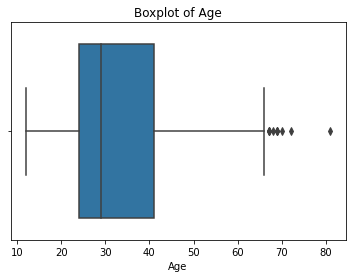

In [64]:
# 1. Show a boxplot of the ‘age’ column.
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

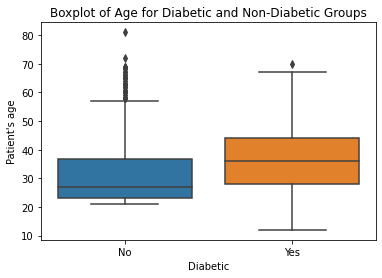

In [65]:
# 2. Show a boxplot of the ‘age’ column of the diabetic and no-diabetic groups side by side.
sns.boxplot(x=df['Outcome'], y=df['Age'])
plt.title('Boxplot of Age for Diabetic and Non-Diabetic Groups')
plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Diabetic')
plt.ylabel("Patient's age")
plt.show()

##### 3. Based on the boxplot of question 2, analyse the relationship between the patient’s age and being diabetic.
As you can see from the boxplot, the risk od developing diabetes increases with age

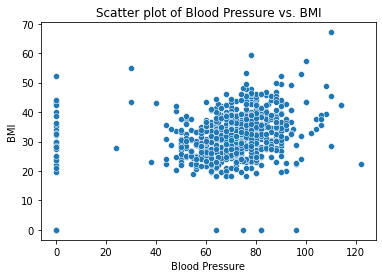

In [66]:
# 4. Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis.
sns.scatterplot(x=df['BloodPressure'], y=df['BMI'])
plt.title('Scatter plot of Blood Pressure vs. BMI')
plt.xlabel("Blood Pressure")
plt.ylabel("BMI")
plt.show()

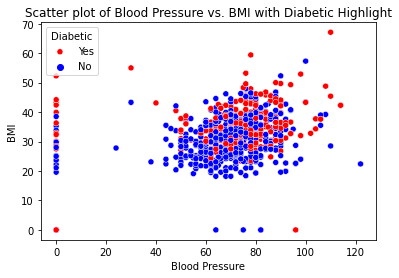

In [67]:
# 5. Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis, 
# highlighting diabetic patients with different colors.
sns.scatterplot(x=df['BloodPressure'], y=df['BMI'], hue=df['Outcome'], palette={0:"blue", 1:"red"}, legend="full")
plt.title('Scatter plot of Blood Pressure vs. BMI with Diabetic Highlight')
plt.xlabel("Blood Pressure")
plt.ylabel("BMI")
plt.legend(title='Diabetic', labels=['Yes', 'No'])
plt.show()

##### 6. Based on the scatterplot of question 5, analyse the relationship between BMI/Blood pressure and diabetes.
Based on the scatterplot we can see that as both BMI and BP increases so does the risk of diabetes

### III) Data filtering

In [68]:
# 1. Select all patients with Insulin more than 400. 
# How many patients are diabetic/no-diabetic among those selected?
insulin_400 = df[df['Insulin'] > 400]
print(insulin_400['Outcome'].value_counts())

1    12
0     8
Name: Outcome, dtype: int64


In [69]:
# 2. Select all patients with Insulin greater than 400 and Glucose greater than 175. 
# How many patients are diabetic/no-diabetic among those selected?
insulin_glucose_filtered = df[(df['Insulin'] > 400) & (df['Glucose'] > 175)]
print(insulin_glucose_filtered['Outcome'].value_counts())

1    5
0    1
Name: Outcome, dtype: int64


In [70]:
# 3. What is the average Glucose level of a patient with more than 5 pregnancies and older than 45?
avg_glucose = df[(df['Pregnancies'] > 5) & (df['Age'] > 45)]['Glucose'].mean()
print("Average Glucose:", avg_glucose)

Average Glucose: 135.36986301369862


In [71]:
# 4. Count the distinct values in the ‘pregnancies’ column.
print(df['Pregnancies'].nunique())

17


In [72]:
# 5. List the distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-diabetic of each value.
pregnancies_values = sorted(df['Pregnancies'].unique())
print("Pregnancies", "Outcome", sep="\t")

for value in pregnancies_values:
    subset = df[df['Pregnancies'] == value]
    total = len(subset)

    diabetic_count = len(subset[subset['Outcome'] == 1])
    non_diabetic_count = len(subset[subset['Outcome'] == 0])

    diabetic_percent = (diabetic_count / total) * 100
    non_diabetic_percent = (non_diabetic_count / total) * 100

    # Displaying the results
    print(value, 0, f"{non_diabetic_percent:.2f}%", sep="\t")
    print("", 1, f"{diabetic_percent:.2f}%", sep="\t")

Pregnancies	Outcome
0	0	66.07%
	1	33.93%
1	0	77.30%
	1	22.70%
2	0	82.41%
	1	17.59%
3	0	64.47%
	1	35.53%
4	0	66.67%
	1	33.33%
5	0	63.79%
	1	36.21%
6	0	68.00%
	1	32.00%
7	0	43.48%
	1	56.52%
8	0	45.00%
	1	55.00%
9	0	34.48%
	1	65.52%
10	0	58.33%
	1	41.67%
11	0	36.36%
	1	63.64%
12	0	55.56%
	1	44.44%
13	0	45.45%
	1	54.55%
14	0	0.00%
	1	100.00%
15	0	0.00%
	1	100.00%
17	0	0.00%
	1	100.00%


# Question 2: Data Cleaning
### I) Duplicated removal

In [73]:
# 1. Identify any duplicated records by printing “True” if the row is duplicated and “False” otherwise
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


In [74]:
# 2. For all duplicated records, keep one record and remove its duplicates.
df = df.drop_duplicates()

In [75]:
# 3. What is the dimension of the data frame after removing the duplicates?
print(df.shape)

(768, 9)


In [76]:
# 4. How many duplicated rows were there (before removing the duplicates)?
number_of_duplicates = pd.read_csv(file_path).duplicated().sum()
print(number_of_duplicates)

20


# II) Missing values

In [77]:
# 1. How many missing values are in the “blood pressure” column?
print(df['BloodPressure'].isnull().sum())

23


In [78]:
# 2. Remove the missing records in the “blood pressure” column.
df = df.dropna(subset=['BloodPressure']) 

In [79]:
# 3. Copy the following columns into a separate data frame.
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_selected = df[selected_columns].copy()

In [80]:
# 4. Use sklearn’s train_test_split function to split the data into 90% training set and 10% testing set.
X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)

In [81]:
# 5. Keep a separate copy of the testing set (evaluation copy) and set all the Glucose to null in the original testing set.
X_test_eval = X_test.copy()
X_test['Glucose'] = np.nan

In [82]:
# 6. Fill in the missing values of the test set based on the mean of the Glucose of the training set and calculate RMSE.
mean_glucose = X_train['Glucose'].mean()
X_test['Glucose'].fillna(mean_glucose, inplace=True)
rmse_mean = mean_squared_error(X_test_eval['Glucose'], X_test['Glucose'], squared=False)
print(rmse_mean)

34.08851888719681


In [83]:
# 7. Fill in the missing values of the test set based on the median of the Glucose and calculate RMSE.
X_test['Glucose'] = np.nan
median_glucose = X_train['Glucose'].median()
X_test['Glucose'].fillna(median_glucose, inplace=True)
rmse_median = mean_squared_error(X_test_eval['Glucose'], X_test['Glucose'], squared=False)
print(rmse_median)

34.43486605172147


In [84]:
# 8. Use scikit-learn SimpleImputer with the 'most_frequent' strategy to impute the value of glucose in the testing set and calculate RMSE.
X_test['Glucose'] = np.nan
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train[['Glucose']])
X_test['Glucose'] = imputer.transform(X_test[['Glucose']]).ravel()
rmse_most_frequent = mean_squared_error(X_test_eval['Glucose'], X_test['Glucose'], squared=False)
print(rmse_most_frequent)

41.11252850409471
